In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
warnings.simplefilter(action = "ignore")
sns.set(style="white")

In [2]:
data = pd.read_csv('data/churn_prediction.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Visualization

In [61]:
#Helper function
def stacked_graph(data, feature):
    phone_service = data.groupby([feature, 'Churn']).size().unstack()
    phone_service = phone_service.div(phone_service.sum(axis = 1), axis = 0) * 100
    phone_service.reset_index(inplace = True)
    phone_service.plot(x = feature, kind = 'barh', stacked = True)
    plt.xlabel('percent')
    plt.ylabel(feature)
    plt.show()

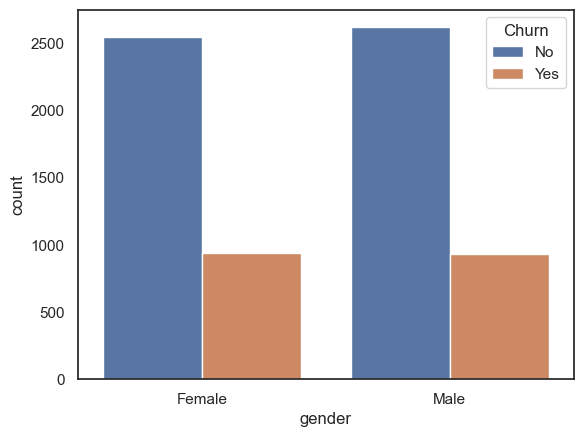

In [12]:
sns.countplot(x = data['gender'], hue = data['Churn'])
plt.show()

1. The gender distribution is even as well as the churn distribution per gender is even as well
2. Due to this, gender does not provide a lot of information to predict Churn

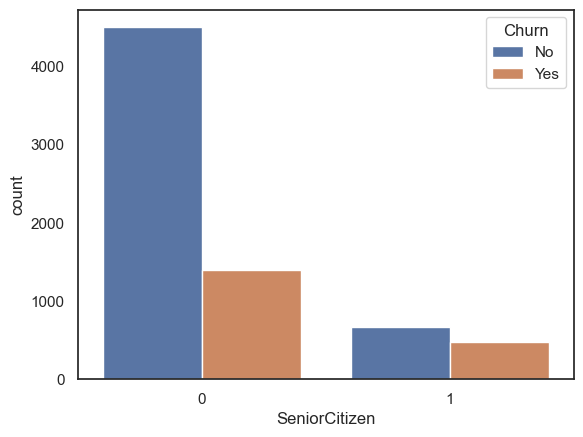

In [13]:
sns.countplot(x = data['SeniorCitizen'], hue = data['Churn'])
plt.show()

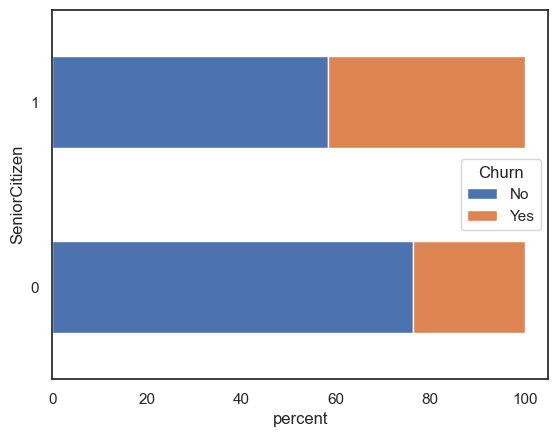

In [14]:
stacked_graph(data, 'SeniorCitizen')

1. The total number of senior citizens that churn is lower. However, the proportion of senior citizens is higher than the proportion of non senior citizens that churn

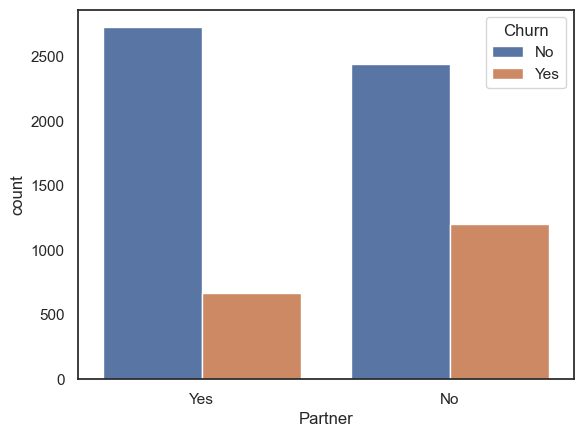

In [20]:
sns.countplot(x = data['Partner'], hue = data['Churn'])
plt.show()

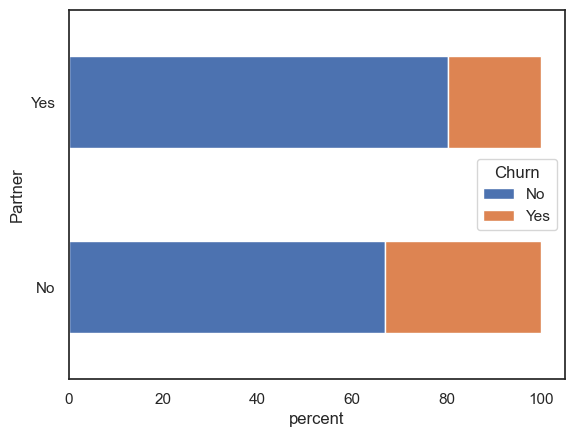

In [62]:
stacked_graph(data, 'Partner')

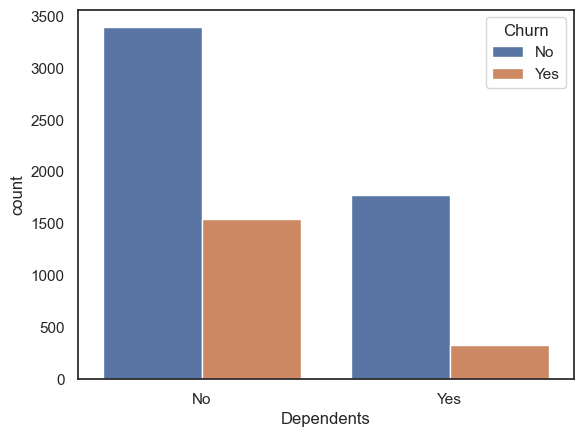

In [24]:
sns.countplot(x = data['Dependents'], hue = data['Churn'])
plt.show()

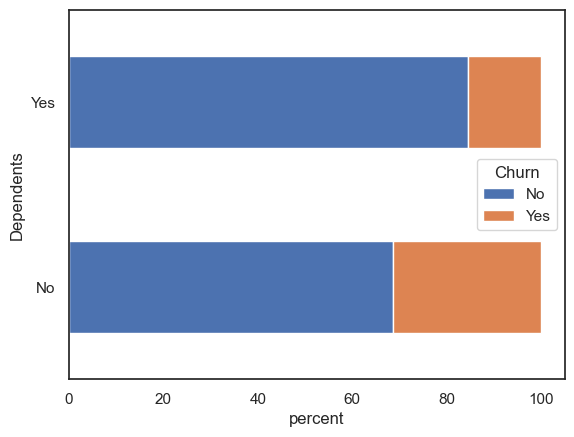

In [25]:
stacked_graph(data, 'Dependents')

1. Users that do nat have Partners and/or dependents are more likely to churn

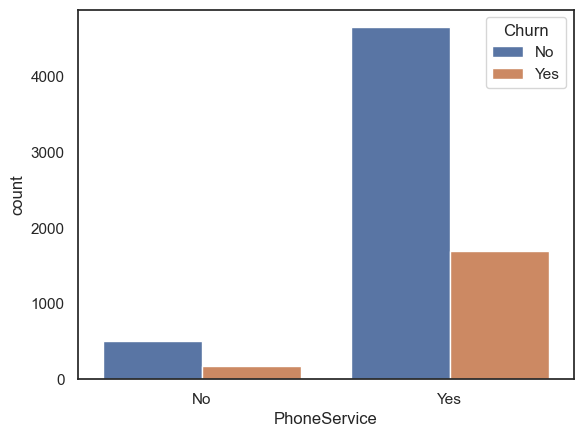

In [28]:
sns.countplot(x = data['PhoneService'], hue = data['Churn'])
plt.show()

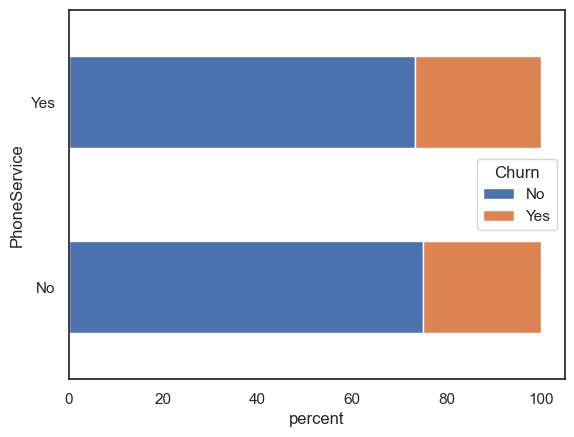

In [29]:
stacked_graph(data, 'PhoneService')

1. The proportion of users with a phone service and without a phone service that churn is the same
2. Phone service does not provide good information to predict whether a user will churn or not

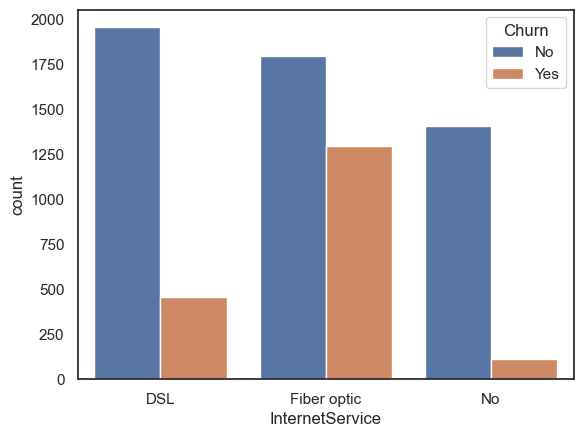

In [36]:
sns.countplot(x = data['InternetService'], hue = data['Churn'])
plt.show()

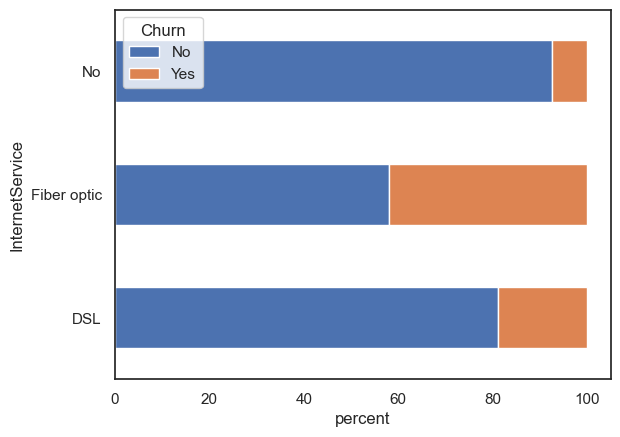

In [33]:
stacked_graph(data, 'InternetService')

1. Users with Fiber Optic internet service are more likely to churn

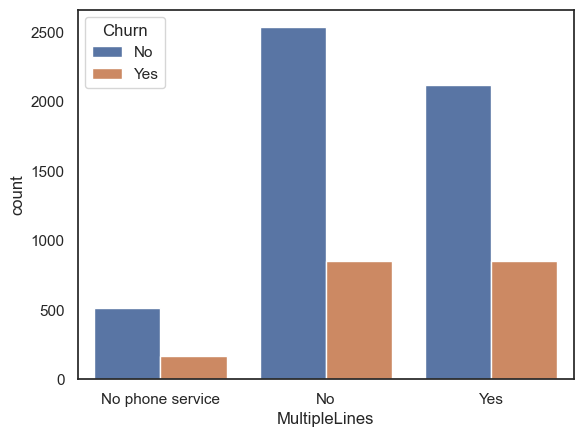

In [41]:
sns.countplot(x = 'MultipleLines', hue = 'Churn', data = data)
plt.show()

1. User with multiple lines are more likely to churn as well

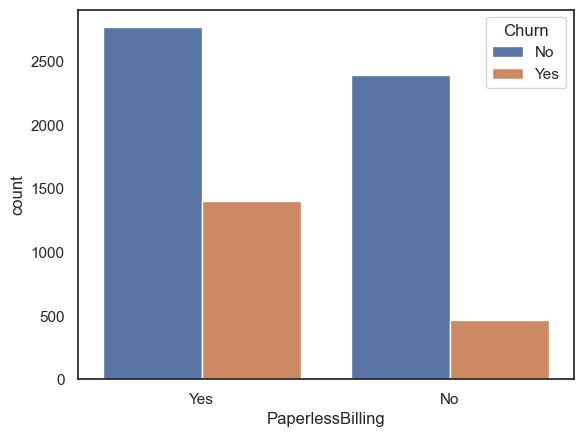

In [380]:
sns.countplot(x = data['PaperlessBilling'], hue = data['Churn'])
plt.show()

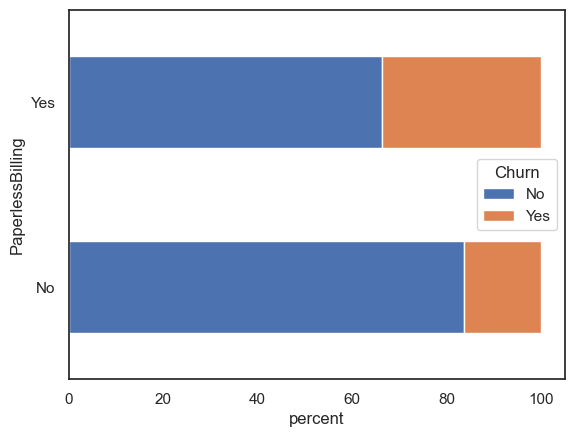

In [414]:
stacked_graph(data, 'PaperlessBilling')

1. User who opted in for Paperless Billing are more likely to churn

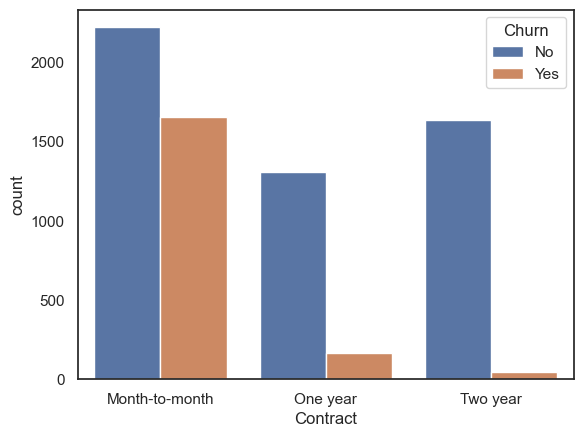

In [382]:
sns.countplot(x = data['Contract'], hue = data['Churn'])
plt.show()

1. Users with shorter contracts are more likely to churn

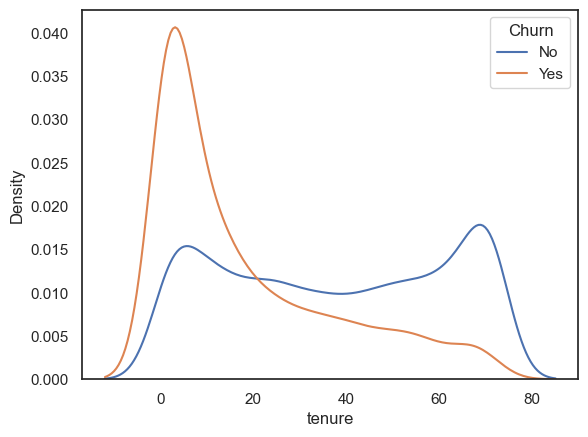

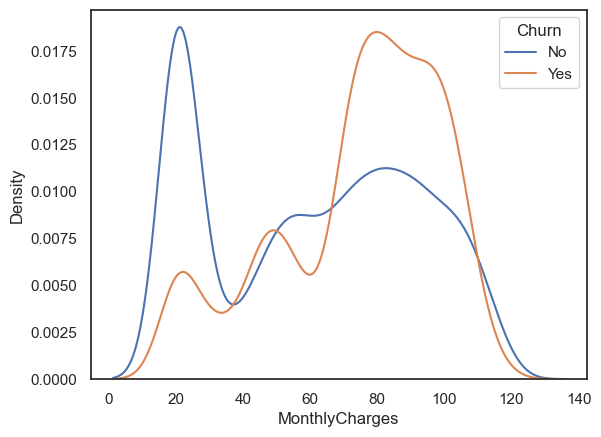

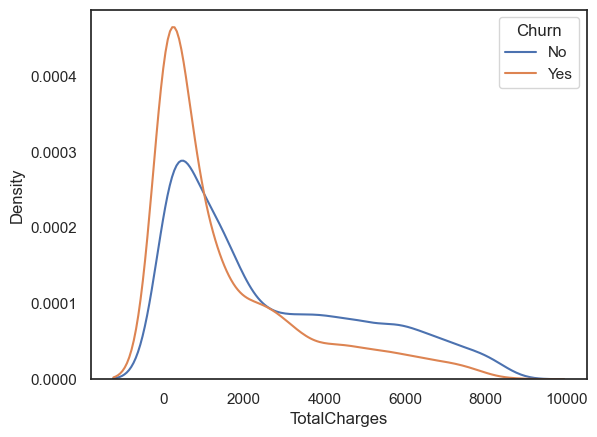

In [167]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in features:
    sns.kdeplot(x = data[data["Churn"]=='No'][feature],hue = 'Churn', data = data, label = 'No Churn')
    sns.kdeplot(x = data[data["Churn"]=='Yes'][feature],hue = 'Churn', data = data, label = 'Churn')
    plt.show()

1. Highest number of people churn within the first 30 months. It is very important to cater very well to new users that have been with the compnay for < 30 months
2. Users with higher monthly charges are more likely to churn

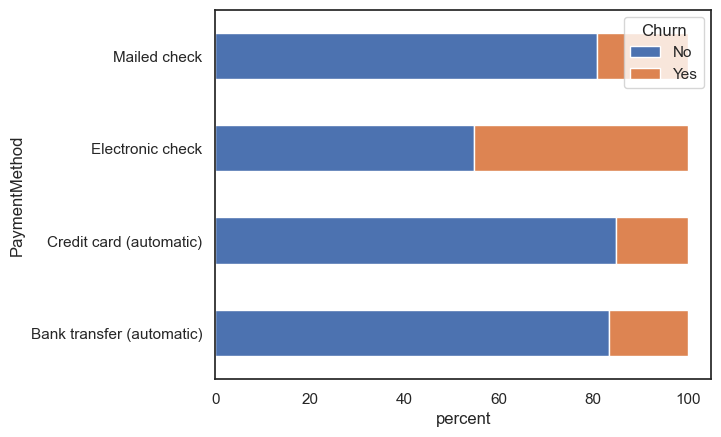

In [416]:
stacked_graph(data, 'PaymentMethod')

1. Users that pay with electroic checks are more likely to churn. This payment method needs to be checked whether users are facing troubles making payments using electronic checks

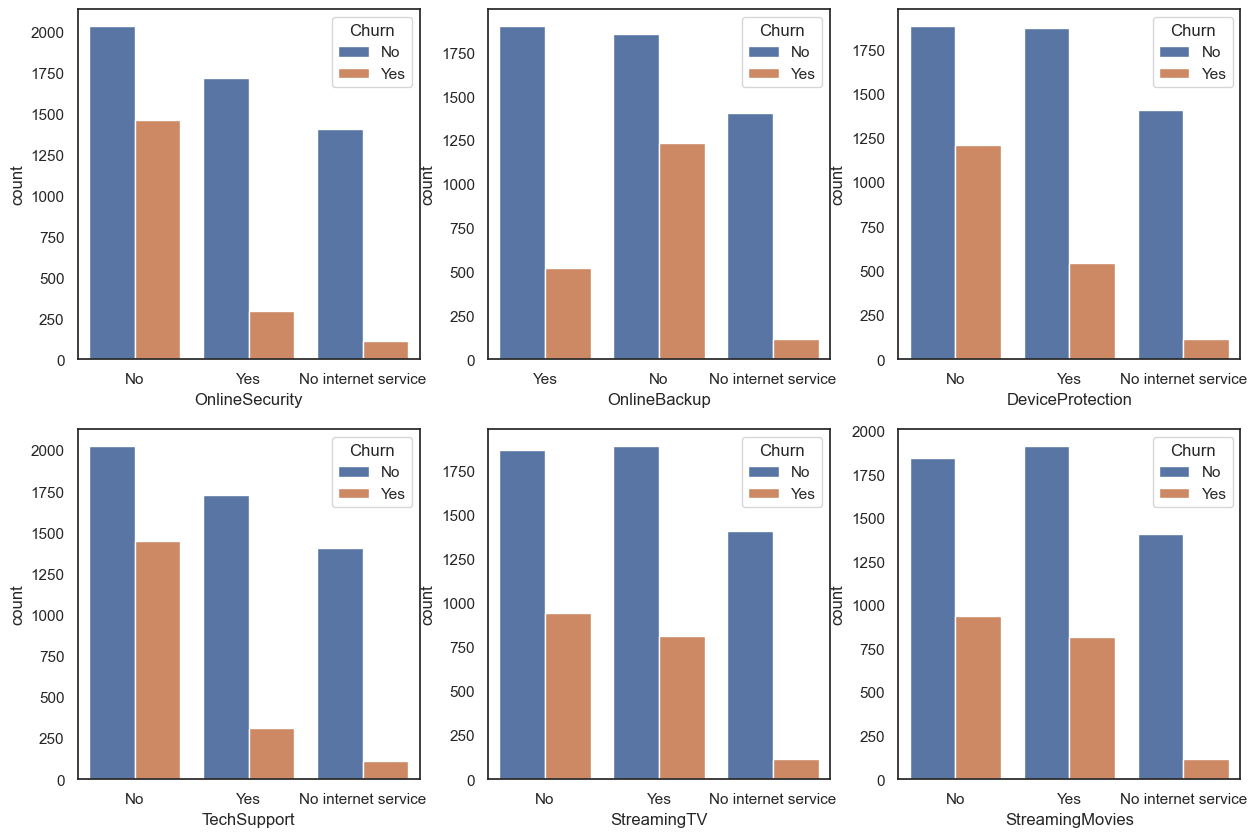

In [60]:
features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
f, ax =  plt.subplots(2,3,figsize=(15,10))
ax = ax.flatten()
for i, feature in zip(ax, features):
    sns.countplot(x = data[feature], hue = data['Churn'], ax = i)
plt.show()    

1. Users with no online security, no online back up, no device protection, no tech support are more likely to churn
2. There is no major difference between users that use streaming tv and users that do not. Hence, it is not a great factor to predict churn. The same is the case with streaming movies

### Feature Engineering

In [64]:
data.drop(['customerID'], axis = 1, inplace = True)

data['gender'] = data['gender'].replace('Female', 1)
data['gender'] = data['gender'].replace('Male', 0)

data['Partner'] = data['Partner'].replace('Yes', 1)
data['Partner'] = data['Partner'].replace('No', 0)

data['Dependents'] = data['Dependents'].replace('Yes', 1)
data['Dependents'] = data['Dependents'].replace('No', 0)

data['PhoneService'] = data['PhoneService'].replace('Yes', 1)
data['PhoneService'] = data['PhoneService'].replace('No', 0)

data['PaperlessBilling'] = data['PaperlessBilling'].replace('Yes', 1)
data['PaperlessBilling'] = data['PaperlessBilling'].replace('No', 0)

data['Churn'] = data['Churn'].replace('Yes', 1)
data['Churn'] = data['Churn'].replace('No', 0)

In [65]:
data.head(100)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,12,1,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,78.95,927.35,1
96,0,0,1,1,71,1,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,1,Credit card (automatic),66.85,4748.70,0
97,0,0,0,0,5,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,21.05,113.85,1
98,0,0,0,0,52,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),21.00,1107.20,0


In [61]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)